In [1]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       reg_data.csv
Book3.csv                  headbrain.csv  sample_pivot.csv
Canada.xlsx                mic2.xlsx      tips.csv
Cartwheeldata.csv          mic.xlsx       weight-height.csv


# Class 7: Pie charts and sunburst

In [2]:
#pip install xlrd

In [3]:
import pandas as pd

In [4]:
#pip install openpyxl

In [5]:
import numpy as np

In [6]:
df = pd.read_excel("datasets/mic2.xlsx", 
                        engine = 'openpyxl')

In [7]:
df.head(2)

,Timestamp,Name,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,2021-09-24 11:41:37.540,Jobish Vallikavungal Devassia,31 - 40,Male,Research,">40, 000",5,5,5,4,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,2021-09-24 11:44:42.933,chikku,21 - 30,Male,student,"<10,000",3,5,3,4,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral


In [8]:
#pip install seaborn

In [9]:
import seaborn as sns

In [10]:
import matplotlib as mpl

In [11]:
import matplotlib.pyplot as plt

In [12]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [13]:
import plotly.express as px

In [14]:
mpl.style.use('ggplot')

In [15]:
counts = df['Age'].value_counts()

In [16]:
counts

21 - 30    37
<=20        6
31 - 40     4
41 - 50     3
Name: Age, dtype: int64

In [17]:
counts = counts.reindex(['<=20','21 - 30','31 - 40','41 - 50'])

In [18]:
type(counts)
counts = counts.to_frame()
type(counts)

pandas.core.frame.DataFrame

In [19]:
counts.iloc[:,:]

,Age
<=20,6
21 - 30,37
31 - 40,4
41 - 50,3


In [20]:
counts['%'] = (counts.iloc[:,:]/counts.loc[:,'Age'].sum(axis = 0))*100

In [21]:
counts

,Age,%
<=20,6,12.0
21 - 30,37,74.0
31 - 40,4,8.0
41 - 50,3,6.0


In [22]:
type(counts)

pandas.core.frame.DataFrame

In [23]:
counts.columns

Index(['Age', '%'], dtype='object')

In [24]:
counts = counts.reset_index()
counts

,index,Age,%
0,<=20,6,12.0
1,21 - 30,37,74.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


In [25]:
counts = counts.rename({'index':'Age_group'},
                      axis = 1)
counts

,Age_group,Age,%
0,<=20,6,12.0
1,21 - 30,37,74.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


<function matplotlib.pyplot.show(*args, **kw)>

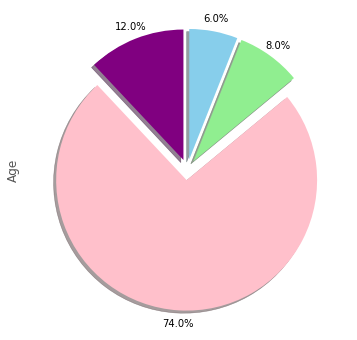

In [26]:
explode_list = [0.08, 0.08, 0.08, 0.08]
color_list = ['purple', 'pink', 'lightgreen', 'skyblue', 'lightgreen', 'pink', 'purple']
counts['Age'].plot(kind = 'pie',
                  figsize = (15,6),
                  autopct = '%1.1f%%',
                    startangle = 90,
                   shadow = True,
                   pctdistance = 1.1,
                   labels = None,
                   explode = explode_list,
                   colors = color_list
                  )
plt.show

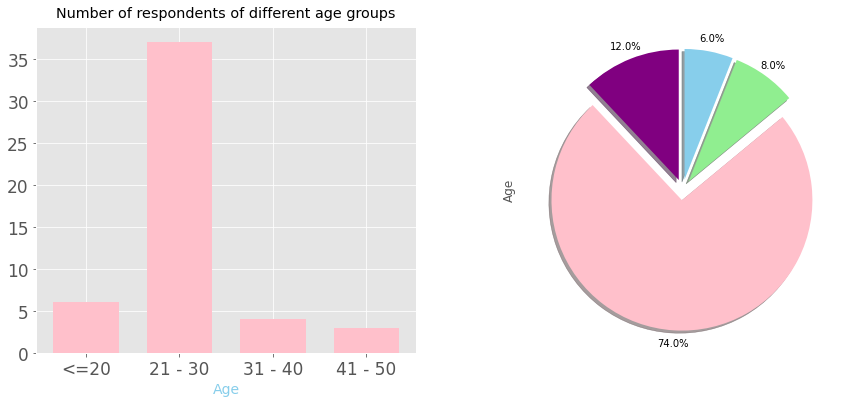

In [27]:
x = list(counts['Age_group'])
y = list(counts['Age'])

plt.subplot(1,2,1)
plt.rcParams['figure.figsize'] = (15,7)
plt.bar(x, y, width = 0.7, color = 'pink')
plt.xlabel('Age Group', fontweight = 'regular', color = 'purple', fontsize = 14,
          horizontalalignment = 'center')
plt.xlabel('Age', fontweight = 'regular', color = 'skyblue', fontsize = 14,
          horizontalalignment = 'center')
plt.xticks(fontsize = 17)
plt.yticks(fontsize = 17)
plt.title('Number of respondents of different age groups', y = 1.01)

plt.subplot(1,2,2)
explode_list = [0.08, 0.08, 0.08, 0.08]
color_list = ['purple', 'pink', 'lightgreen', 'skyblue', 'lightgreen', 'pink', 'purple']
counts['Age'].plot(kind = 'pie',
                  figsize = (15, 6),
                  autopct = '%1.1f%%',
                    startangle = 90,
                   shadow = True,
                   pctdistance = 1.1,
                   labels = None,
                   explode = explode_list,
                   colors = color_list
                  )
plt.show()